In [ ]:
# подключаем библиотеки
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
# считываем данные
X = pd.read_csv("https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/titanic_train.csv")

In [ ]:
# указываем зависимую переменную
y = X['Survived']

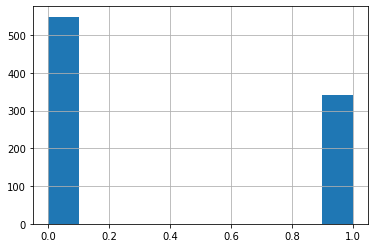

In [ ]:
# посмотрим на распеделение значений целевого признака
y.hist()

In [ ]:
# посмотрим на первые пять строк данных
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# посмотрим, как распределены выжившие в зависимости от пола
X[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
X['Ticket'].value_counts()

CA. 2343             7
1601                 7
347082               7
347088               6
CA 2144              6
                    ..
STON/O 2. 3101269    1
113783               1
11771                1
26707                1
A/5 2817             1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
# удаляем из входов зависимую перменную и некоторые  признаки
X.drop(['Survived',  'Name', 'PassengerId', 'Ticket','Cabin'], axis=1, inplace=True)

In [ ]:
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [ ]:
X['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# заполняем пропуски
X['Age'].fillna(X['Age'].median(), inplace=True) # числовой признак
X['Embarked'].fillna('S',inplace=True) # нечисловой признак

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [ ]:
# кодируем поле Embarked методом дамми-кодирования
X = pd.concat([X,  pd.get_dummies(X['Embarked'], prefix="Embarked")],  axis=1)
# удаляем старое поле Embarked 
X.drop(['Embarked'], axis=1, inplace=True)
# кодируем поле Sex обычным способом (0 и 1)
X['Sex'] = pd.factorize(X['Sex'])[0]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [ ]:
from sklearn.model_selection import train_test_split
# Разбиение набора данных на обучающую и тестовую части в соотношении 3:1.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Построение дерева решений. max_depth - максимальная глубина дерева
dectree = DecisionTreeClassifier(max_depth=4, random_state=21)
# обучаем на обучающей выборке
dectree.fit(X_train,y_train)
#считаем точность Accuracy на тестовой выборке
dectree.score(X_test,y_test)

0.8071748878923767

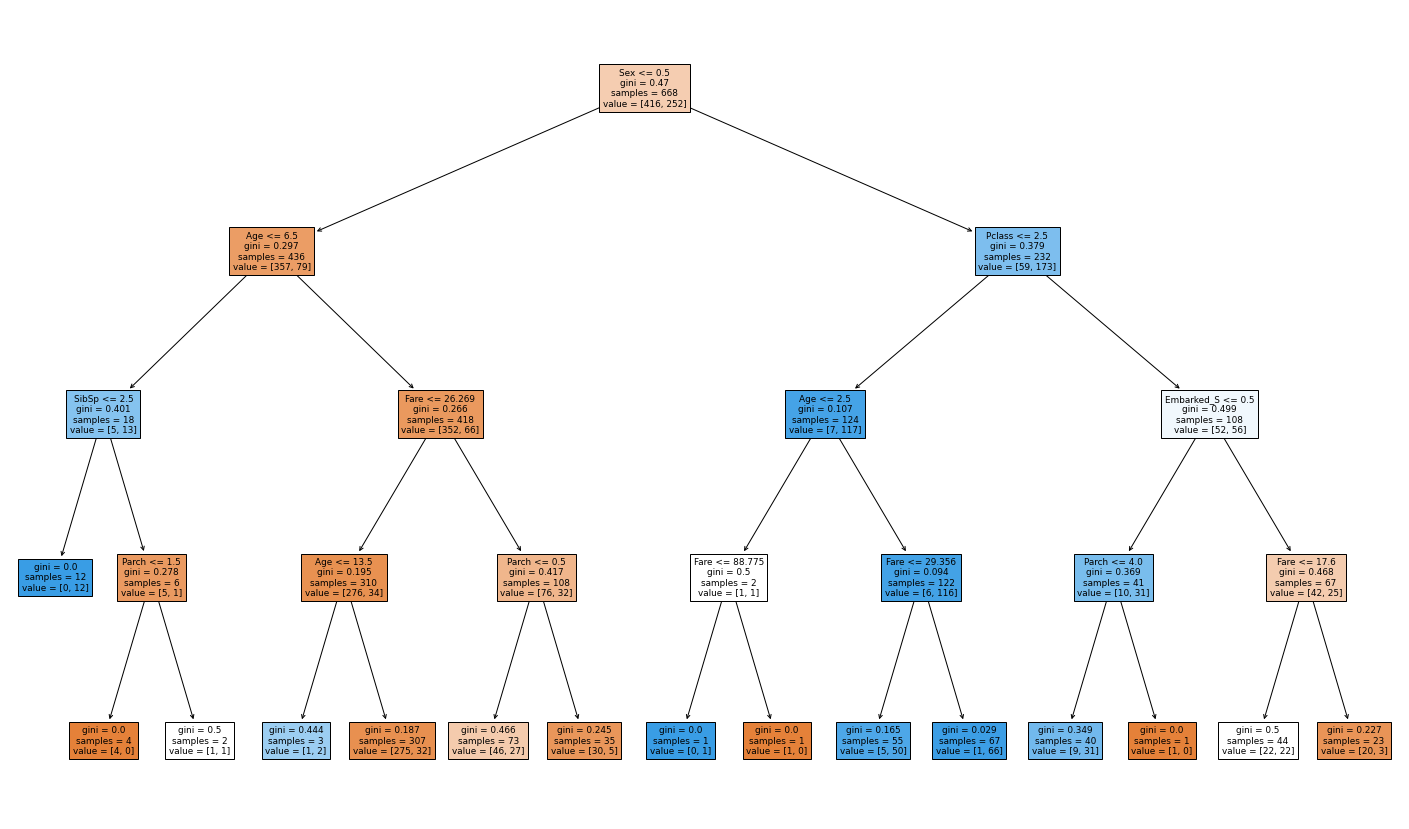

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=((25,15)))
plot_tree(dectree, 
          filled=True,
          feature_names=X.columns)
plt.show()

In [ ]:
# Построение случайного леса. max_depth - максимальная глубина дерева, n_estimators - количество деревьев
rfc = RandomForestClassifier(n_estimators = 30,  max_depth=5,  random_state=21)
rfc.fit(X_train, y_train)
rfc.score (X_test, y_test)

0.8116591928251121

In [ ]:
# построим матрицу ошибок классификации для случайного леса
y_pred=rfc.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,123,10
1,32,58


In [ ]:
#посчитаем более объективную метрику f1
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7341772151898734

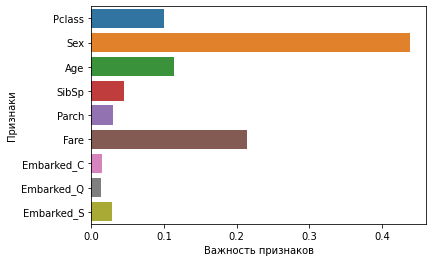

In [ ]:
# посмотрим на значимость признаков согласно RandomForest
import seaborn as sns
sns.barplot(x=rfc.feature_importances_, y=X_test.columns)
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBClassifier
cl = XGBClassifier(n_estimators = 30, max_depth = 5, random_state=21)
cl.fit(X_train,y_train)
cl.score(X_test, y_test)

0.8251121076233184

In [ ]:
# построим матрицу ошибок классификации для градиентного бустинга
y_pred=cl.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,126,7
1,32,58


In [ ]:
#посчитаем более объективную метрику f1 для градиентного бустинга
f1_score(y_test,y_pred)

0.7483870967741936

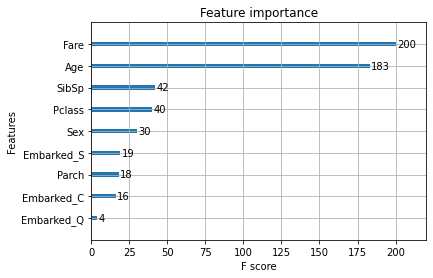

In [ ]:
# посмотрим на значимость признаков согласно xgboost
xgb.plot_importance(cl)